In [1]:
import pandas as pd 
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E:\DS\ineuron\marketing_campaign1.csv",sep = "\t")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.shape

(2240, 29)

## Data Cleaning and data Preprocessing

We can create an extra column **Age** for better understanding by substracting the **Year_Birth** from 2015 , as we know that its the data set till year 2015 (given in discription)

In [6]:
data['Age'] = 2015 - data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,31
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,34


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

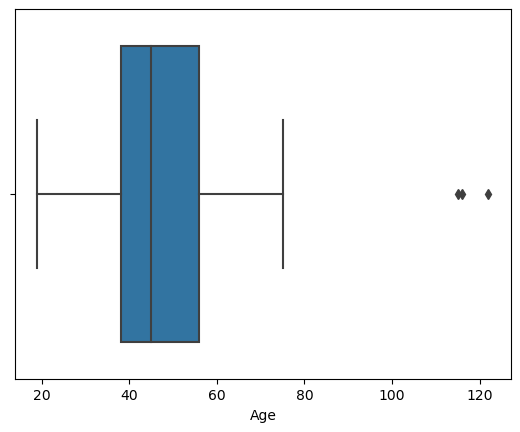

In [7]:
# Checking the outliers in Age column
sns.boxplot(data['Age'])

In [8]:
IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
lower_limit = data['Age'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Age'].quantile(0.75) + (IQR * 1.5)

outliers_data = np.where(data['Age'] > upper_limit, True, np.where(data['Age'] < lower_limit, True, False))
sum(outliers_data)


3

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Updated_Age'>

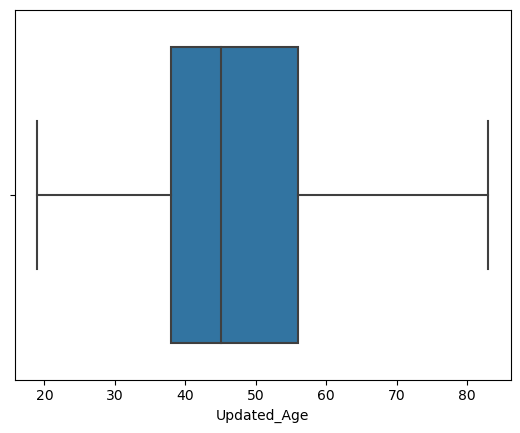

In [9]:
# Now let's replace the outliers by the maximum and minimum limit
data['Updated_Age'] = pd.DataFrame(np.where(data['Age'] > upper_limit, upper_limit, np.where(data['Age'] < lower_limit, lower_limit, data['Age'])))

# also now check the outliers to confirm 
sns.boxplot(data['Updated_Age'])


In [10]:
# Now lets drop the extra age column and change the data tye of Updated_Age column to int data type to keep dataframe proper
data['Updated_Age'] = data['Updated_Age'].astype('int')

data.drop(columns = ['Age'],inplace = True)

Now we can classify and make a new column of difrrent age groups people for better understanding the market behaviour  
**Age below 19 are clissified as Teens  
age group of 20 to 39 as Adults  
age group of 40 to 59 as Seniors  
age group of more than 60 as Old Age**

In [11]:
data.loc[data['Updated_Age']<=19,"Age_Group"] = "Teens"
data.loc[(data['Updated_Age']>19)&(data['Updated_Age']<=39),"Age_Group"] = "Adults"
data.loc[(data['Updated_Age']>39)&(data['Updated_Age']<=59),"Age_Group"] = "Senior_Adults"
data.loc[(data['Updated_Age']>59)&(data['Updated_Age']<=100),"Age_Group"] = "Old_age"

In [12]:
# Now similary we examine the total spendings 
# Creating a new columns of Total spending by adding all spendings together
data["Total_Spending"] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [13]:
# Similarly we can look total children 
data['Children'] = data['Kidhome'] + data['Teenhome']

In [14]:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [15]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Here above we can do that 
* we can consider married and together as married   
* divorced , widow alone Absured and YOLO as Alone 

In [16]:
data['Marital_Status'] = data.Marital_Status.replace({
    "Together" : "Married",
    "Divorced" : "Alone",
    "Widow" : "Alone",
    'Absurd' : 'Alone',
    'YOLO' : 'Alone'
})

In [17]:
# Now lets make a new column i.e. Months_of_Enrolment 
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) # converted to datetime data type

data['Months_enrolment'] = (2015 - data.Dt_Customer.dt.year) * 12 +(1-data.Dt_Customer.dt.month)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15952\3084386155.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) # converted to datetime data type
C:\Users\DELL\AppData\Local\Temp\ipykernel_15952\3084386155.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) # converted to datetime data type
C:\Users\DELL\AppData\Local\Temp\ipykernel_15952\3084386155.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) # converted to datetime data type
C:\Users\DELL\AppData\Local\Temp\ipykernel_15952\3084386155.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format.

In [18]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Updated_Age,Age_Group,Total_Spending,Children,Months_enrolment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,58,Senior_Adults,1617,0,33
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,61,Old_age,27,2,5
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,50,Senior_Adults,776,0,17
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,31,Adults,53,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,34,Adults,422,1,12


# Exploratory Data Analysis

In [19]:
Marital_Group = data.groupby("Marital_Status").agg(Total_Records = ("Marital_Status","size"),
                                                  Total_Amount = ("Total_Spending","sum"),
                                                   Avg_amount = ("Total_Spending","mean")
                                                  )
Marital_Group

,Total_Records,Total_Amount,Avg_amount
Marital_Status,,,
Alone,316,202558,641.006329
Married,1444,863318,597.865651
Single,480,291112,606.483333


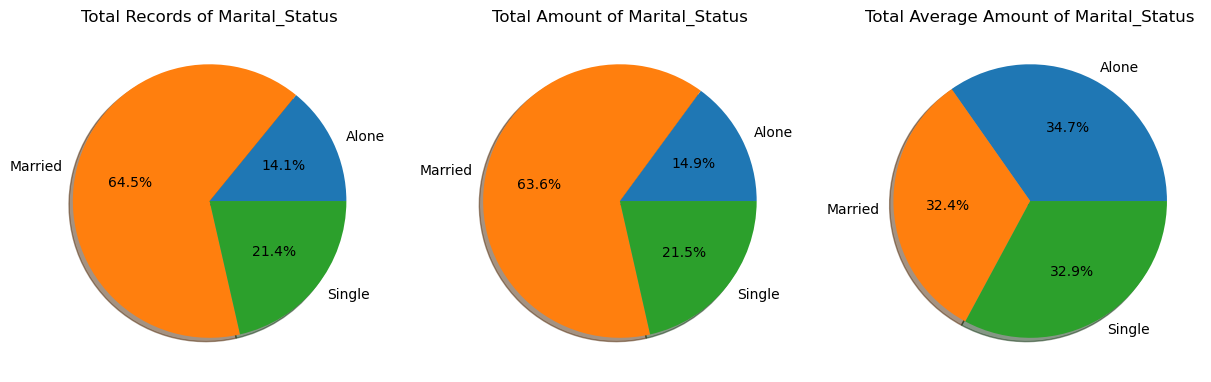

In [20]:
plt.figure(figsize = (15, 10))
plt.subplot(1 , 3, 1)
plt.pie(x = Marital_Group.Total_Records, labels=Marital_Group.index, autopct='%1.1f%%',shadow = True)
plt.title(f"Total Records of {Marital_Group.index.name}")



plt.subplot(1 , 3, 2)
plt.pie(x = Marital_Group.Total_Amount, labels=Marital_Group.index, autopct='%1.1f%%',shadow = True)
plt.title(f"Total Amount of {Marital_Group.index.name}")


plt.subplot(1 , 3, 3)
plt.pie(x = Marital_Group.Avg_amount, labels=Marital_Group.index, autopct='%1.1f%%' ,shadow = True)
plt.title(f"Total Average Amount of {Marital_Group.index.name}")



plt.show()



The above pie chart tells that 64.5% of the cutomers are married which shares the nearly 63% of the spendings of all the persons visited . But when we look towards the Alone persons which or only near to 14% but shares 34% of the total spendings , however we can conclude that also that alone persons buys the more products or maybe buy the costly products and so married persons attracted towards the normal priced products 

In [21]:
# Now we analyse by people of diffrent age group 
Age_group = data.groupby("Age_Group").agg(Total_Records = ("Age_Group","size"),
                                                  Total_Amount = ("Total_Spending","sum"),
                                                   Avg_amount = ("Total_Spending","mean")
                                                  )
Age_group

,Total_Records,Total_Amount,Avg_amount
Age_Group,,,
Adults,693,375849,542.350649
Old_age,368,273005,741.861413
Senior_Adults,1177,707996,601.525913
Teens,2,138,69.000000


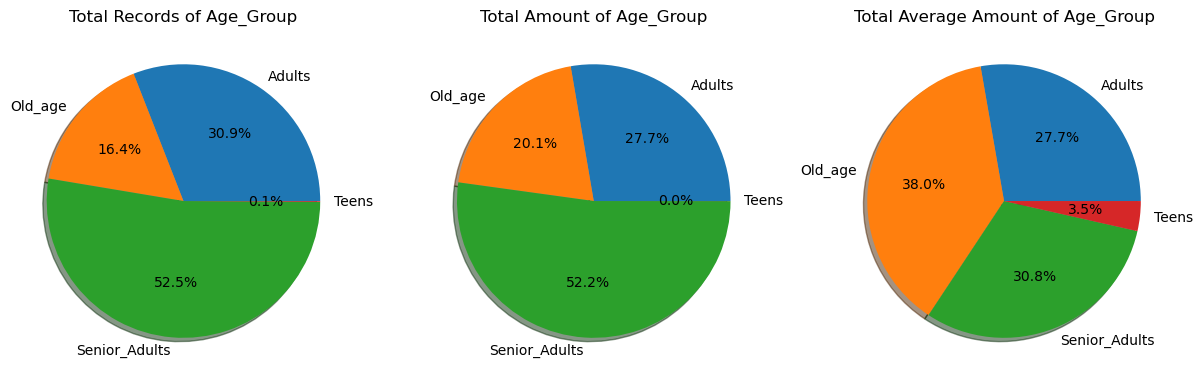

In [22]:
plt.figure(figsize = (15, 10))
plt.subplot(1 , 3, 1)
plt.pie(x = Age_group.Total_Records, labels=Age_group.index, autopct='%1.1f%%',shadow = True)
plt.title(f"Total Records of {Age_group.index.name}")


plt.subplot(1 , 3, 2)
plt.pie(x = Age_group.Total_Amount, labels=Age_group.index, autopct='%1.1f%%',shadow = True)
plt.title(f"Total Amount of {Age_group.index.name}")
          
          
plt.subplot(1 , 3, 3)
plt.pie(x = Age_group.Avg_amount, labels=Age_group.index, autopct='%1.1f%%' ,shadow = True)
plt.title(f"Total Average Amount of {Age_group.index.name}")



plt.show()



In the pie chart we can see that 52.6 % senior adult people (age between 40 to 59 ) visited and also shares nearly 52% of spendings whereas old people ( age more than 60 ) are only 16 % but shares 20% of spending i.e. the average spending of old persons is nearly about 38%  

In [23]:
Education_Group = data.groupby("Education").agg(Total_Records = ("Marital_Status","size"),
                                                  Total_Amount = ("Total_Spending","sum"),
                                                   Avg_amount = ("Total_Spending","mean")
                                                  )
Education_Group

,Total_Records,Total_Amount,Avg_amount
Education,,,
2n Cycle,203,100795,496.527094
Basic,54,4417,81.796296
Graduation,1127,698626,619.898846
Master,370,226359,611.781081
PhD,486,326791,672.409465


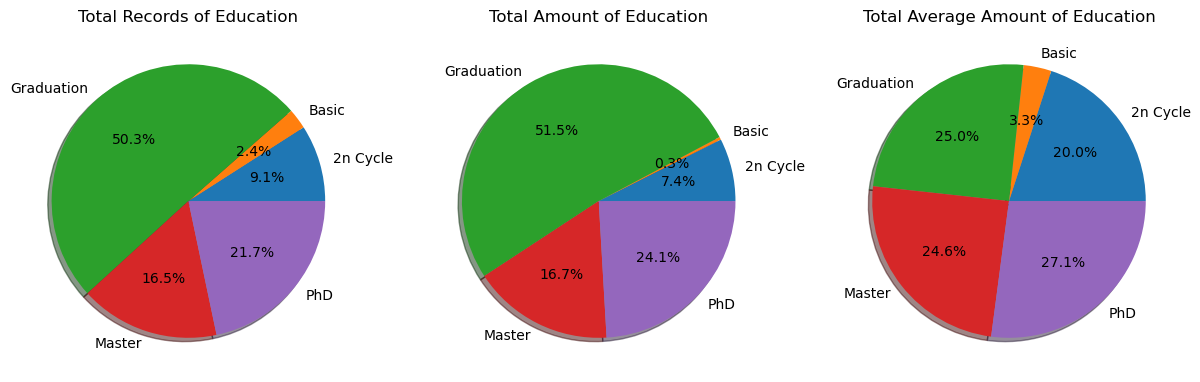

In [24]:
plt.figure(figsize = (15, 10))
plt.subplot(1 , 3, 1)
plt.pie(x = Education_Group.Total_Records, labels=Education_Group.index, autopct='%1.1f%%',shadow = True)
plt.title(f"Total Records of {Education_Group.index.name}")


plt.subplot(1 , 3, 2)
plt.pie(x = Education_Group.Total_Amount, labels=Education_Group.index, autopct='%1.1f%%',shadow = True)
plt.title(f"Total Amount of {Education_Group.index.name}")
          
          
plt.subplot(1 , 3, 3)
plt.pie(x = Education_Group.Avg_amount, labels=Education_Group.index, autopct='%1.1f%%' ,shadow = True)
plt.title(f"Total Average Amount of {Education_Group.index.name}")



plt.show()



The pie chart shows that the majority of customers fall under the "Graduation" education level . This could imply that the Graduation education level is more common among the customers .
It's worth noting that customers with a "PhD" and "Master" education level have higher average amounts compared to the other education levels, indicating potential higher financial engagement.

In [25]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Updated_Age             0
Age_Group               0
Total_Spending          0
Children                0
Months_enrolment        0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

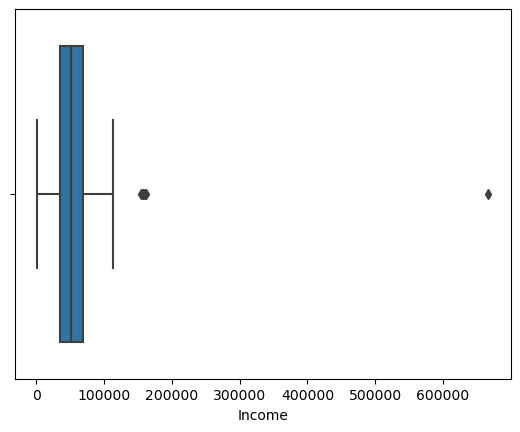

In [26]:
sns.boxplot(data['Income'])

In [27]:
IQR = data['Income'].quantile(0.75) - data['Income'].quantile(0.25)
lower_limit = data['Income'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Income'].quantile(0.75) + (IQR * 1.5)

outlier_data = np.where(data['Income'] > upper_limit, True, np.where(data['Income'] < lower_limit, True, False))
sum(outlier_data)


8

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

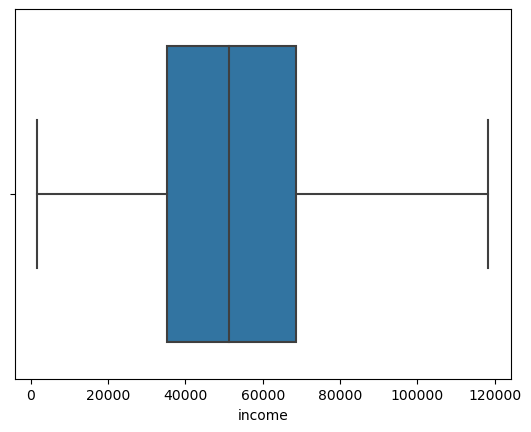

In [28]:
# We batter treat these outliers by relacing with maximumor minimum value its not be a better decision to drop them 
data['income'] = pd.DataFrame(np.where(data['Income'] > upper_limit, upper_limit, np.where(data['Income'] < lower_limit, lower_limit, data['Income'])))

# also now check the outliers to confirm 
sns.boxplot(data['income'])

In [29]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Updated_Age             0
Age_Group               0
Total_Spending          0
Children                0
Months_enrolment        0
income                 24
dtype: int64

In [30]:
data.dropna(inplace = True)

In [31]:
# Now lets drop the extra Income column and keep the income column after cleaning to keep dataframe proper
data['income'] = data['income'].astype(int)
data.drop(columns = ['Income'],inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-nul

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Spending'>

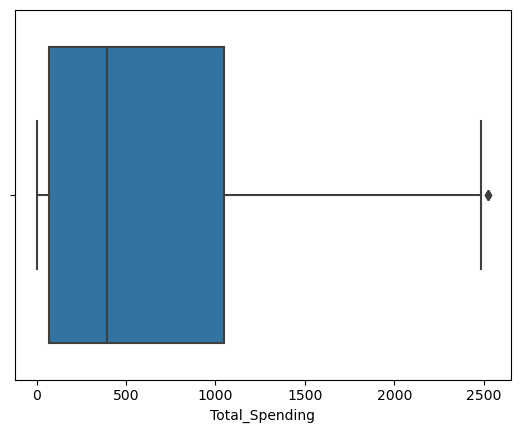

In [33]:
sns.boxplot(data['Total_Spending'])

In [34]:
IQR = data['Total_Spending'].quantile(0.75) - data['Total_Spending'].quantile(0.25)
lower_limit = data['Total_Spending'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['Total_Spending'].quantile(0.75) + (IQR * 1.5)

outlier_data1 = np.where(data['Total_Spending'] > upper_limit, True, np.where(data['Total_Spending'] < lower_limit, True, False))
sum(outlier_data1)


3

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='All_spending'>

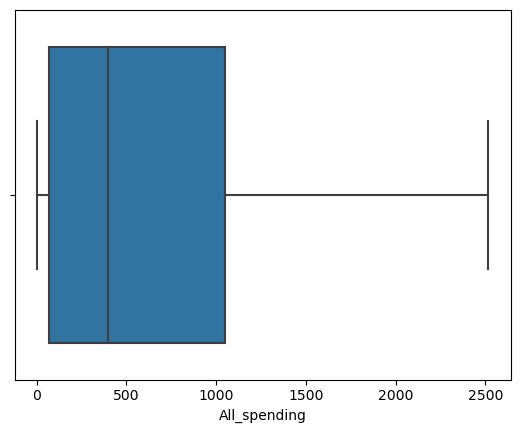

In [35]:
# We batter treat these outliers by relacing with maximumor minimum value its not be a better decision to drop them 
data['All_spending'] = pd.DataFrame(np.where(data['Total_Spending'] > upper_limit, upper_limit, np.where(data['Total_Spending'] < lower_limit, lower_limit, data['Total_Spending'])))

# also now check the outliers to confirm 
sns.boxplot(data['All_spending'])

In [36]:
data['All_spending'].isna().sum()

23

In [37]:
data.dropna(inplace = True)

In [38]:
data['All_spending'] = data['All_spending'].astype(int)
data.drop(columns = ['Total_Spending'],inplace = True)

# Cluster Modeling

In [39]:
final_data = data.drop(['ID','Education','Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer',
                       'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
                       'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                       'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
                       'Complain','Z_CostContact','Z_Revenue','Response','Age_Group'], axis = 1)

In [40]:
final_data.head()

,Recency,Updated_Age,Children,Months_enrolment,income,All_spending
0,58,58,0,33,58138,1617
1,38,61,2,5,46344,27
2,26,50,0,17,71613,776
3,26,31,1,3,26646,53
4,94,34,1,12,58293,422


In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(final_data)
pca_df=pd.DataFrame(pca.transform(final_data), columns=(["col1","col2", "col3"]))

In [42]:
pca_df.head()

,col1,col2,col3
0,6244.117663,1008.382109,8.992122
1,-5550.083203,-580.134678,-10.847675
2,19719.009866,165.670319,-23.213001
3,-25248.083110,-551.629476,-22.922912
4,6398.964058,-186.626476,44.794951


In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [44]:
clusterRange = range(2,21)
inertiaRange = []
silhouterange = []
for m in clusterRange:
    model_m = KMeans(n_clusters = m , init='k-means++' )
    model_m.fit(pca_df)
    inertiaRange.append(model_m.inertia_)
    silhouterange.append(metrics.silhouette_score(pca_df,model_m.labels_))

In [45]:
print(list(clusterRange))
print()
print(inertiaRange)
print()
print(silhouterange)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

[278978012423.6589, 147979108240.74893, 90843724588.80736, 62318288918.463684, 48065322125.91824, 36432684204.23641, 28748944283.406883, 23372715142.45646, 18822251116.2067, 15259331746.250538, 12850234435.972149, 11091327273.482292, 9339113917.558016, 8172310825.631778, 7264367763.298259, 6527374275.577306, 5867882381.2197485, 5358050864.06085, 4871062274.721446]

[0.6077548332656899, 0.5428451276288693, 0.5281918646978083, 0.5256302153391399, 0.5034697065678935, 0.5132207704209492, 0.510115562736333, 0.5080789407636486, 0.50212964544739, 0.5073883106760543, 0.5061574155258752, 0.5003699640643993, 0.5015154618612003, 0.49521213279055215, 0.4910287368171284, 0.48926326937593134, 0.4921441882011157, 0.48150448335792206, 0.48184950676705846]


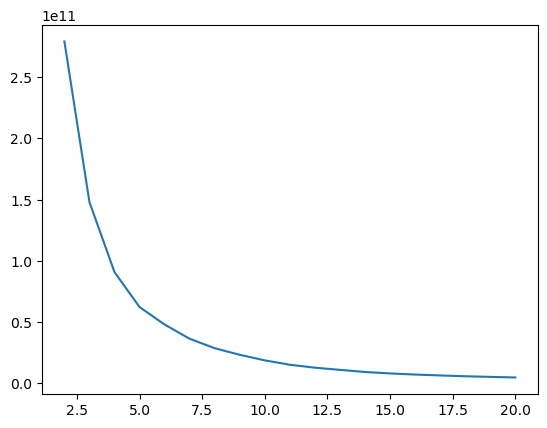

In [46]:
plt.plot(clusterRange,inertiaRange )

In [47]:
# number of cluster shall be 4
k=4
model1 = KMeans(n_clusters = k)
model1.fit(final_data)

KMeans(n_clusters=4)

In [48]:
labels = model1.labels_

In [49]:
predictions = pd.DataFrame(model1.labels_,columns=['cluster_num'])

In [50]:
predictions.head()

,cluster_num
0,3
1,1
2,0
3,2
4,3


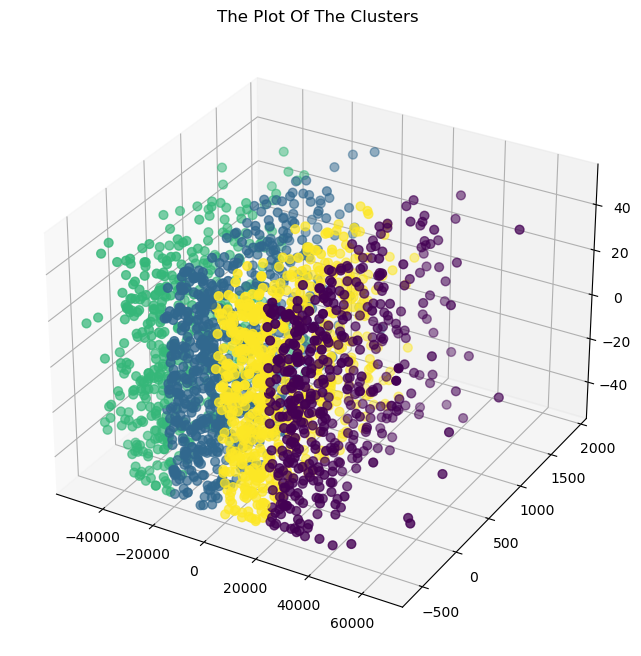

In [51]:
pca_df["Clusters"] = labels
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(pca_df["col1"], pca_df["col2"], pca_df["col3"], s=40, c=pca_df["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [52]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([final_data,predictions],axis=1)
cluster_df

,Recency,Updated_Age,Children,Months_enrolment,income,All_spending,cluster_num
0,58.0,58.0,0.0,33.0,58138.0,1617.0,3.0
1,38.0,61.0,2.0,5.0,46344.0,27.0,1.0
2,26.0,50.0,0.0,17.0,71613.0,776.0,0.0
3,26.0,31.0,1.0,3.0,26646.0,53.0,2.0
4,94.0,34.0,1.0,12.0,58293.0,422.0,3.0
...,...,...,...,...,...,...,...
2061,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2078,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2079,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2081,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [53]:
# Saving the Dataframe into CSV file 
cluster_df.to_csv('clusterd_customer_data',index = False)

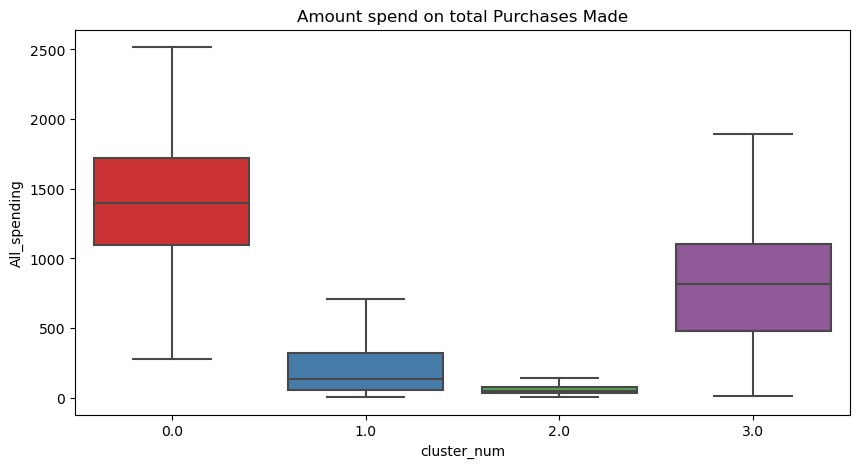

In [54]:
plt.figure(figsize=(10,5))
plt.title(f'Amount spend on total Purchases Made')
ax = sns.boxplot(data=cluster_df, x='cluster_num', y='All_spending', palette=sns.color_palette("Set1"), showfliers=False)
plt.show()

# Cluster Analysis  
The above four clusters can be classified as by using diffrent names for better understanding as described :  
* Cluster 0 ( **Platinum Cluster** )  
    **High Spending Customers :** They are top-tier customers who contributes the most to the store revenue .   They make substantial purchase and are crucial for the business's profitability .spacial attention and personalized services may be offered to maintain their loyalty .  
* Cluster 3 ( **Gold Cluster** )  
    **Moderate Spending Customers :** This group comprises customers who spend moderatly , while they may not be highest spender they still contributes significantly to the business revenue . To maintain their satisfaction and encouraging repeat purchases can be prioritised .  
* Cluster 1 ( **Silver Cluster**)  
       
     **Low Spending Customers :** These customers make relatively small perchases . They might be occasional buyers or budget-conscious shoppers . Strategies to increase their average transaction value or frequency of purchase can be considered .  
* Cluster 2 ( **Bronze Cluster**)  
     
     **Non-Spending Customers :** By understanding their behaviour and pattern we can find the to re-engage them for making purchase . 
  